بر روی دیتاست ماه چیست و با چه روش هایی حل میشود projection مشکل

در بخش هایی که داده ها درهم تنیدگی دارند باعث می شود تا در ان بخش ها نمومه ها بسیار با یکدیگر ترکیب (در نزدیکی ) شوند.
باید از روش هایی همچون LLA استفاده شود

Locally linear embedding 

داده هایی که کورولیشن بالای خطی دارند روی داده های گل زنبق را با الگوریتم زیر حذف کنید

FactorAnalysis (mean)


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [16]:
df= pd.DataFrame(data=X,columns=iris.feature_names)

<Axes: >

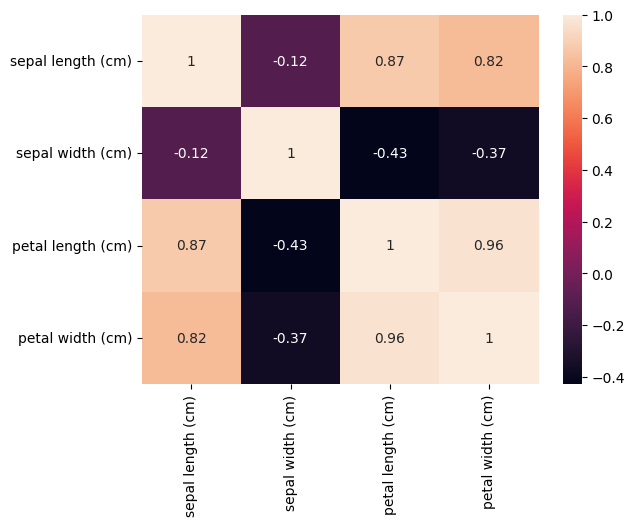

In [19]:
corr= df.corr()
sns.heatmap(corr,annot=True)

In [20]:
# we need to know variance
df.var()

sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

In [22]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=3)
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(150, 3)

ابعاد را به 1 کاهش دهید lda حال با استفاده از

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=1)
xx=clf.fit_transform(X_transformed,y)
# xx = reduced features to 1 
xx.shape

(150, 1)

ICA

برای داده های که ویژگی های آنها کورولیشن غیر خطی دارند استفاده میشود

isomap

فاصله ها را استفاده کرده و از منیفولد استفاده میکند

روی دیتای ماه آن را تست کنید و تغییرات را با پلات کردن نشان دهید

In [43]:
data= datasets.make_moons(n_samples=100,  shuffle=True, noise=None, random_state=42)



(100, 2)

In [44]:
from sklearn.decomposition import FastICA
transformer = FastICA(n_components=1)
X_transformed = transformer.fit_transform(data[0])

/Users/arian/Downloads/ML/venv/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


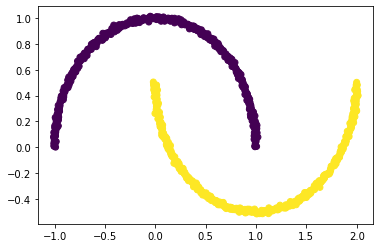

In [16]:
moon data

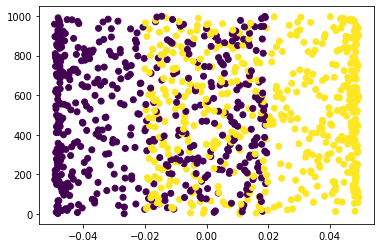

In [21]:
example of exit

tsne

با استفاده از گراف و همسایگی این کار را انجام میدهد و هم نقاط دور را در از هم 

در نظر میگیرد لوکال و گلوبال را در نظر می گیرد

با استفاده از 

umap 

که سرعت پایین الگوریتم قبل را بهبود بخشیده  دیتای ماه را کاهش ابعاد دهید و در انتها با رسم پلات عملکرد ها را مقایسه کنید

(با هر دو الگوریتم این کار را انجام دهید)


In [ ]:
pip install umap-learn

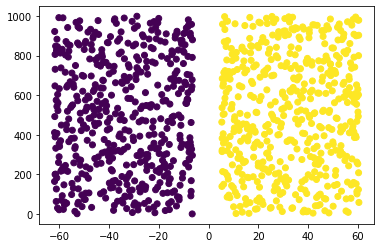

In [27]:
example of exit

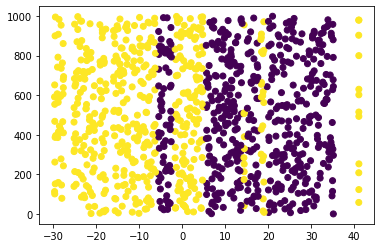

In [29]:
example of exit

یک شبکه عصبی به صورت سریالی با کتابخانه کراس بسازید و آن را در فایلی سیو کنید

In [ ]:
# # import tensorflow as tf 
# # tf.random.set_seed(42)
# # model= tf.keras.Sequential([tf.keras.layers.Dense(300,activation='relu'),tf.keras.layers.Dense(150,activation='relu'),tf.keras.layers.Dense(10,activation='softmax')])
# # model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
# # callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2,restore_best_weights=True) 
# checkpoint_path = "training_1/cp.ckpt"
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)
# # model.fit(X_train,Y_train,epochs=20,validation_data=(X_val,Y_val), callbacks=[callback,cp_callback])

linux

1- در لینوکس برای مخفی سازی از چی استفاده میشود و برای دید فایل های مخفی چه کلیدی در دستور

ls

استفاده میشود

2- آپشن های دستور زیر تحلیل کنید
ls -lahtr

-R رو هم توضیح دهید

3- در تصویر زیر منظور از فلش ها چیست

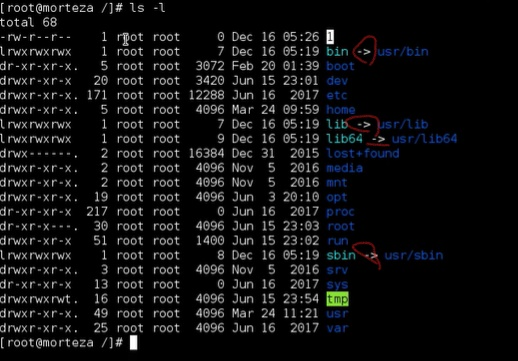
